In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
# Total population 
N = 1268000000
# Number of infected at time t=0 
I0 = 1
# Number of removed (either due to immunity or by death) at time t=0 
R0 =10
# All susceptible individuals at time t=0 
S0=N - I0 - R0

In [47]:
#contact rate
beta = 4
#Infectious period(inverse of the number of days) or recovery time
gamma = 1

In [48]:
# Time from day 0 to day 100 in 1−hour increments 2 
t = np.linspace(0, 20, num=2400)
#t=34

In [49]:
def SIRmodel(compartmentValues, t, N, beta, gamma):
    S, I, R = compartmentValues
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt,dIdt,dRdt

In [50]:
# Vector with initial conditions
compartmentsValues0 = S0, I0, R0

In [51]:
# Integrate the SIR equations over the time grid t and return numerical solutions
SIRmodelNumSolve = odeint(SIRmodel, compartmentsValues0, t, args=(N, beta, gamma))
S, I, R = SIRmodelNumSolve.T

In [54]:
# Integrate the SIR equations over the time grid t and return numerical solutions
SIRmodelNumSolve = odeint(SIRmodel, compartmentsValues0, t, args=(N, beta, gamma*3))
S, I2, R = SIRmodelNumSolve.T

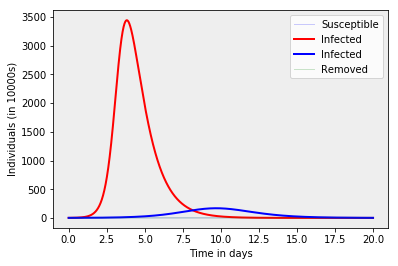

In [55]:
# White background
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(1,1,1, facecolor="#eeeeee", axisbelow=True)
# Plot the data for three separate curves: S(t), I(t), and R(t) 
ax.plot(t, S/N, "b", alpha=0.2, lw=1, label="Susceptible")
ax.plot(t, I, "r", lw=2, label="Infected") 
ax.plot(t, I2, "b", lw=2, label="Infected") 
ax.plot(t, R/N, "g", alpha=0.2, lw=1, label="Removed")
ax.set_xlabel("Time in days") 
ax.set_ylabel("Individuals (in " + str(N) + "s)")
ax.legend()
# The moment of truth
plt.show()

In [13]:
len(S)

2400

In [14]:
len(t)

2400

In [15]:
t

array([0.00000000e+00, 2.91788245e-02, 5.83576490e-02, ...,
       6.99416424e+01, 6.99708212e+01, 7.00000000e+01])